# Econometric Methods WiSe 2023/2024 Home Assignment

## Group Members
* Josef Fella, stu
* Robert Hennings, stu236320

In [6]:
# Load the data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as st
path = r"/Users/Robert_Hennings/Dokumente/Uni/Master/3.Semester/Econometric Methods/Home Assignment/"
data_file = "HA_smoking.dta"
smoking_data = pd.read_stata(path + data_file)
print(f"Loaded data successfully with shape: {smoking_data.shape}")

Loaded data successfully with shape: (10000, 8)


## Exercise 1)

### a)
### Import and briefly describe the dataset.

In [7]:
smoking_data.head(20)

,smoker,smkban,age,hsdrop,hsgrad,colsome,colgrad,female
0,1,1,41,0,1,0,0,1
1,1,1,44,0,0,1,0,1
2,0,0,19,0,0,1,0,1
3,1,0,29,0,1,0,0,1
4,0,1,28,0,0,1,0,1
5,0,0,40,0,0,1,0,0
6,1,1,47,0,0,1,0,1
7,1,0,36,0,0,1,0,0
8,0,1,49,0,0,1,0,1
9,0,0,44,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   smoker   10000 non-null  int8 
 1   smkban   10000 non-null  int8 
 2   age      10000 non-null  int8 
 3   hsdrop   10000 non-null  int8 
 4   hsgrad   10000 non-null  int8 
 5   colsome  10000 non-null  int8 
 6   colgrad  10000 non-null  int8 
 7   female   10000 non-null  int8 
dtypes: int8(8)
memory usage: 156.2 KB


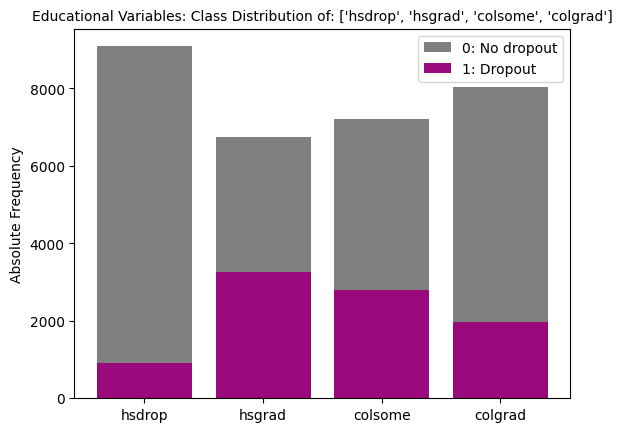

In [5]:
smoking_data.describe()
smoking_data.info()
smoking_data.isna().value_counts()

# Look at the different class distributions in the base dataset
# Genders in %
(smoking_data.female.value_counts() / smoking_data.shape[0]) * 100
# Gender representation seems to be quite 

# Age distribution
(smoking_data.age.value_counts() / smoking_data.shape[0]) * 100

# Looking at the educational variables
educ_df = pd.DataFrame()
for educ_var in smoking_data.columns[3:7]:
    educ_df[educ_var] = smoking_data[educ_var].value_counts()

# Class distribution
plt.bar(x=smoking_data.columns[3:7], height=educ_df.loc[0], color="grey", label="0: No dropout")
plt.bar(x=smoking_data.columns[3:7], height=educ_df.loc[1], color="#9b0a7d", label="1: Dropout")
plt.title(f"Educational Variables: Class Distribution of: {smoking_data.columns[3:7].to_list()}", fontsize=10)
plt.ylabel("Absolute Frequency")
plt.legend()
plt.show()

In [ ]:
# Class distribution of age
plt.hist(smoking_data.age, bins=30, density=True, color="#9b0a7d")
plt.vlines(x=round(np.mean(smoking_data.age)), ymin=0, ymax= 0.050, color="black", linewidth=1)
plt.title("Histogram of Age")
plt.ylabel("Density")
plt.xlabel("Age Range")
plt.show()

### b)
### Estimate the regression using the OLS method with heteroscedasticity
### robust standard errors. Interpret $\hat{\beta_{1}}$. Is it statistically significant?

In [ ]:
# Estimate the model
# Add the age^2 variable
smoking_data.insert(3, "age_sqrt", smoking_data.age.apply(lambda x: np.power(x, 2)))
# use heteroscedasticity robust standard errors and add constant intercept
smoking_data.insert(1, "constant_", 1)

In [10]:
lin_reg = sm.regression.linear_model.OLS(endog=smoking_data["smoker"], exog=smoking_data[smoking_data.columns[1:]])
lin_reg_fit = lin_reg.fit(cov_type="HC2")
print(lin_reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 smoker   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     80.51
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.35e-129
Time:                        15:31:31   Log-Likelihood:                -5449.7
No. Observations:               10000   AIC:                         1.092e+04
Df Residuals:                    9991   BIC:                         1.098e+04
Df Model:                           8                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant_     -0.0269      0.042     -0.647      0.5

### Interpret beta_hat_1
### beta_hat_1 captures the effect of an existing smoking ban at the work place
### Remember this variable was binary

In [11]:
print(lin_reg_fit.params["smkban"])

-0.04805196345001899


### -0.04805196345001899
### The estimated parameter of the smkban has the desired sign and
### is about: -0.04805196345001899 what would mean that if a smoking ban exists at the work
### place (smkban=1) it reduces the likelihood that the individual smokes since
### the parameters reduces the result by its sign, its magnitude is rather small
### being roughly -0.05 what could indicate the strength of the taken measures at
### the work place

### Is beta_hat_1 statistically significant?
### Since its p-value is <0.05 we can argue that it is statistically significant

In [9]:
hypothesis_0 = "smkban = 0"
t_test_smkban = lin_reg_fit.t_test(hypothesis_0, use_t=True)
print(t_test_smkban)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0481      0.009     -5.349      0.000      -0.066      -0.030


### p-value: 0.000
### Since the p-value is < 0.05 and even <0.01 we have to reject the H0 Hypothesis
### that the estimated beta parameter for the variable smkban is 0 or insignificant

In [ ]:
z_score = ((0 - lin_reg_fit.params["smkban"]) / t_test_smkban.summary_frame()["std err"])
st.norm.pdf(z_score)
# Compare t value with critical value for test decision
abs(t_test_smkban.summary_frame()["t"])

### c)
### Does the probability of smoking increase or decre- ase with the level of education?
### Observe the educational related variables: hsdrop, hsgrad, colsome, colgrad,

In [ ]:
print(lin_reg_fit.summary())

### Observing the educational related variables inlcuded in the model one can see
### the following trend: 
### the higher the education of an individual the less likely or the smaller the chance
### that this individual is a smoker
### as high school drop outs have an effect of 0.2822, high school grads: 0.2246
### attended a college: 0.1556 and finally college grads are least likely ending up
### as a smoker with: 0.0433

In [12]:
print(abs(lin_reg_fit.params.diff()))

constant_         NaN
smkban       0.021180
age          0.057812
age_sqrt     0.009889
hsdrop       0.282320
hsgrad       0.057636
colsome      0.068939
colgrad      0.112291
female       0.075457
dtype: float64


### where the effect or absolute difference is biggest between attended college and
### the college grads, so finishing college is advised

### Perform Wald test for joint parameter test
### test if hsdrop and hsgrad have the same effect for the smoking probability

In [13]:
hypothesis_0 = ' = '.join(["hsdrop", "hsgrad"])
wald_test = lin_reg_fit.wald_test(hypothesis_0)
print(wald_test.statistic)

[[10.2478391]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


### chi2 statistic: 10.2478391
### p-value: 0.0013684480785456001
### Compare with critical value for test decision

### d)
### Predict with fitted model and interprete

In [ ]:
smkban_pred = 1
age_pred = 70
age_sqrt_pred = np.power(age_pred, 2)
hsdrop_pred, hsgrad_pred, colsome_pred = 0, 0, 0
colgrad_pred = 1
female_pred = 1

In [ ]:
# Keep the correct order
smoking_data[smoking_data.columns[1:]]

x_pred = [1, smkban_pred, age_pred, age_sqrt_pred, hsdrop_pred, hsgrad_pred, colsome_pred, colgrad_pred, female_pred]

y_pred = lin_reg_fit.predict(x_pred)
y_pred
# -0.01326874

### Estimate seems to be very low, so the bespoke individual seems to be very 
### unlikely to be a smoker and contradictingly has a negative sign

In [14]:
# Linear probability model is not appropriate in this case
print(smoking_data.query("age >= 70"))
# 103 rows out of 10000 records
print(smoking_data.query("age >= 70 and smoker == 1").shape)

      smoker  constant_  smkban  age  age_sqrt  hsdrop  hsgrad  colsome  \
131        0          1       1   76      5776       0       0        1   
169        0          1       0   76      5776       1       0        0   
196        0          1       1   78      6084       0       0        0   
203        0          1       0   71      5041       0       1        0   
275        0          1       0   78      6084       0       1        0   
...      ...        ...     ...  ...       ...     ...     ...      ...   
9096       0          1       0   75      5625       0       1        0   
9204       0          1       0   74      5476       0       0        1   
9220       0          1       0   74      5476       0       1        0   
9288       0          1       1   73      5329       1       0        0   
9921       1          1       1   72      5184       0       1        0   

      colgrad  female  
131         0       1  
169         0       0  
196         0       1  
203

### 15 records ou of the >= 70s that smoke
### and only two are college grads
### So these given settings represent an extreme case where the trained linear model
### with its average effect might lead to insufficient accuracy 

# Execise 2)
### a)
### average partial effects of smoking ban on probability of smoking using i) probit and ii) logit model
### i) Probit Model

In [ ]:
probit_mod = sm.Probit(endog=smoking_data["smoker"], exog=smoking_data[smoking_data.columns[1:]])
probit_mod_fit = probit_mod.fit()
probit_mod_fit.summary()
# Average Partial Effect (APE)
probit_mod_ape = probit_mod_fit.get_margeff(at="mean", method="dydx", atexog="smkban")
# estimate: smkban: -0.0485
probit_mod_ape.summary()
# 'dydx' - change in `endog` for a change in `exog`
# mkban: -0.0485

### ii) Logit Model

logit_mod = sm.Logit(endog=smoking_data["smoker"], exog=smoking_data[smoking_data.columns[1:]])
logit_mod_fit = logit_mod.fit()
logit_mod_fit.summary()
# Average Partial Effect (APE)
logit_mod_ape = logit_mod_fit.get_margeff(at="mean", method="dydx", atexog="smkban")
# estimate: smkban: 0.2652
logit_mod_ape.summary()
# 'dydx' - change in `endog` for a change in `exog`
# mkban: -0.0464

### Effect statistically significant?

### Display the results side by side in a compariosn table

param = "smkban"
lin_reg_eff = lin_reg_fit.params[param]
logit_eff = logit_mod_ape.summary_frame().loc[param, "dy/dx"]
probit_eff = probit_mod_ape.summary_frame().loc[param, "dy/dx"]

comp_eff_df = pd.DataFrame(index=["Linear Regression", "Logit Model", "Probit Model"],
                           data=[lin_reg_eff, logit_eff, probit_eff],
                           columns=["Average Partiial Effects (APE)"])
print(comp_eff_df)

### b)
### Probit Model to calculate the effect for groups specified
### Estimate the model new for the groups or predict for the groups?

### i) male, 40 years old, college graduate.

exog_probit_i = smoking_data.query("female == 0 and age == 40 and colgrad == 1").copy().reset_index(drop=True)
probit_mod_i = sm.Probit(endog=exog_probit_i["smoker"], exog=exog_probit_i[exog_probit_i.columns[1:]])
probit_mod_i_fit = probit_mod_i.fit()
probit_mod_i_fit.summary()
# Average Partial Effect (APE)
probit_mod_i_ape = probit_mod_i_fit.get_margeff(at="mean", method="dydx", atexog="smkban")
# estimate: smkban: -0.1600
print(probit_mod_i_ape.summary())
# -0.0485

### ii) female, 20 years old, high school dropout.

exog_probit_ii = smoking_data.query("female == 1 and age == 20 and hsdrop == 1").copy().reset_index(drop=True)
probit_mod_ii = sm.Probit(endog=exog_probit_ii["smoker"], exog=exog_probit_ii[exog_probit_ii.columns[1:]])
probit_mod_ii_fit = probit_mod_ii.fit()
# numpy.linalg.LinAlgError: Singular matrix
probit_mod_ii_fit.summary()
# Average Partial Effect (APE)
probit_mod_ii_ape = probit_mod_ii_fit.get_margeff(at="mean", method="dydx", atexog="smkban")
# estimate: smkban:
print(probit_mod_ii_ape.summary())